# Dia 6: Avaliação de sistema de recomendação com Teste A/B e Teste de Hipóteses

Neste notebook, vamos validar se um sistema de recomendação melhora a taxa de conversão em um e-commerce, utilizando [A/B Testing Dataset](https://www.kaggle.com/datasets/zhangluyuan/ab-testing/data). Os dados utilizados contém informações sobre usuários expostos a diferentes versões do site e suas conversões ao longo do tempo.

### Objetivos
- Comparar duas versões do site com Teste A/B.
- Aplicar Testes de Hipótese para verificar se a diferença é significativa.
- Analisar os dados e interpretar os resultados estatísticos.

### Sumário
- Carregar os dados do experimento A/B
- Criar uma amostra representativa
- Analisar estatísticas e visualizar os dados
- Executar o Teste A/B comparando as versões do site
- Aplicar um Teste de Hipótese para validar os resultados

No final, determinaremos se a nova versão do site deve ser implementada.

## Importações

### 0.1 Bibliotecas e módulos

In [31]:
import kagglehub
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### 0.2 Carregamento do Dataset

In [32]:
# Download do Dataset
path = kagglehub.dataset_download("zhangluyuan/ab-testing")
print("Path to dataset files:", path)

Path to dataset files: /Users/liviagrigolon/.cache/kagglehub/datasets/zhangluyuan/ab-testing/versions/1


In [33]:
path_csv = path + "/ab_data.csv"
df_testes = pd.read_csv(path_csv)

# Verificar se carregou corretamente
df_testes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [34]:
df_testes.head()  # Visualizar as primeiras linhas

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [35]:
df_testes.info()  # Verificar tipos de dados e valores nulos
df_testes.describe()  # Estatísticas gerais

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


## 1 Criar amostragem

In [36]:
df_amostra = df_testes.sample(n=5000, random_state=42)  # Amostra fixa para reprodutibilidade

## 2 Analisar estatísticas e visualizar dados

/var/folders/tb/3rkysv496vs8fxvth4bytgs40000gn/T/ipykernel_78283/2926960058.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_summary.index, y=df_summary["conversion_rate"], palette=colors)


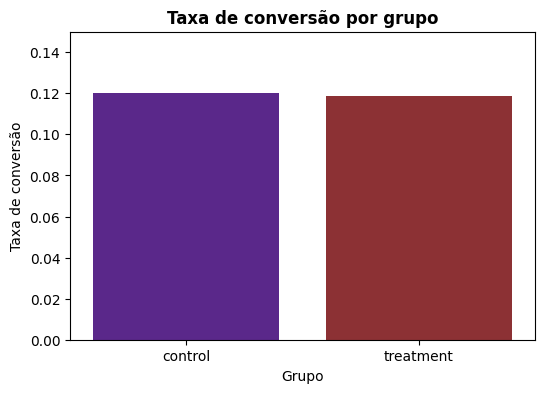

In [37]:
# Criar um DataFrame com os dados resumidos
df_summary = df_testes.groupby("group")["converted"].agg(["mean", "count", "sum"])
df_summary["conversion_rate"] = df_summary["sum"] / df_summary["count"]

# Definir paleta de cores
colors = ["#5A189A", "#9B2226"]

# Gráfico de Barras - Taxa de conversão por grupo
plt.figure(figsize=(6, 4))
sns.barplot(x=df_summary.index, y=df_summary["conversion_rate"], palette=colors)
plt.xlabel("Grupo")
plt.ylabel("Taxa de conversão")
plt.title("Taxa de conversão por grupo", fontweight="bold")
plt.ylim(0, 0.15)  # Ajuste baseado nos valores observados
plt.show()

Sem diferenças visíveis. As barras das conversões são praticamente iguais entre os grupos "control" e "treatment", indicando que o novo sistema de recomendação não teve um impacto relevante.

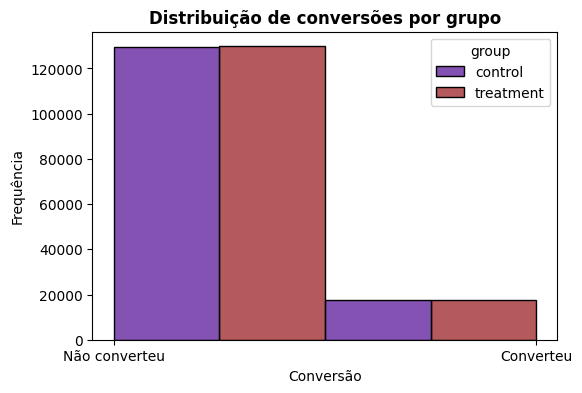

In [38]:
# Gráfico de distribuição - Histograma das conversões
plt.figure(figsize=(6, 4))
sns.histplot(df_testes, x="converted", hue="group", multiple="dodge", bins=2, palette=colors)
plt.xlabel("Conversão")
plt.ylabel("Frequência")
plt.title("Distribuição de conversões por grupo", fontweight="bold")
plt.xticks([0, 1], ["Não converteu", "Converteu"])
plt.show()

O histograma mostra que a quantidade de usuários que não converteram (barra à esquerda) é muito maior do que os que converteram (barra à direita) em ambos os grupos.

/var/folders/tb/3rkysv496vs8fxvth4bytgs40000gn/T/ipykernel_78283/2499731675.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="group", y="converted", data=df_testes, ci=95, palette=colors)
/var/folders/tb/3rkysv496vs8fxvth4bytgs40000gn/T/ipykernel_78283/2499731675.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="group", y="converted", data=df_testes, ci=95, palette=colors)


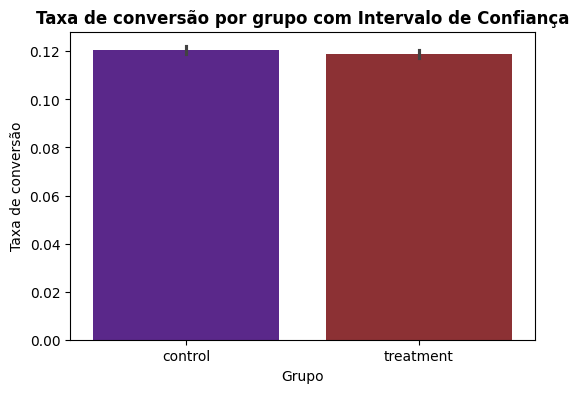

In [39]:
# Converter 'timestamp' para datetime e criar coluna de dia para análise temporal
df_testes["timestamp"] = pd.to_datetime(df_testes["timestamp"])
df_testes["date"] = df_testes["timestamp"].dt.date

# Gráfico de Barras com Intervalo de Confiança
plt.figure(figsize=(6, 4))
sns.barplot(x="group", y="converted", data=df_testes, ci=95, palette=colors)
plt.xlabel("Grupo")
plt.ylabel("Taxa de conversão")
plt.title("Taxa de conversão por grupo com Intervalo de Confiança", fontweight="bold")
plt.show()

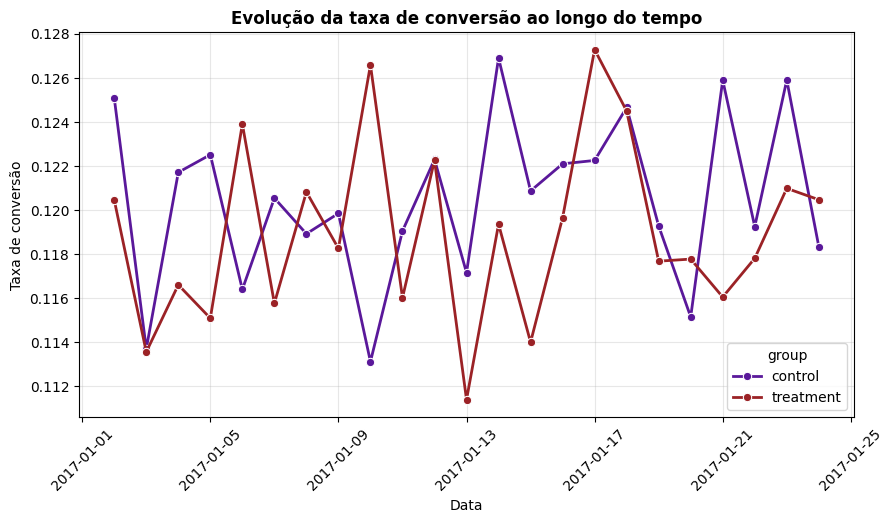

In [40]:
# Linha de Tempo da Conversão
df_time_series = df_testes.groupby(["date", "group"])["converted"].mean().reset_index()

plt.figure(figsize=(10, 5))  # Aumentei a largura para melhor leitura
sns.lineplot(
    data=df_time_series, 
    x="date", 
    y="converted", 
    hue="group", 
    palette=colors, 
    marker="o", 
    markersize=6, 
    linewidth=2
)

plt.xlabel("Data")
plt.ylabel("Taxa de conversão")
plt.title("Evolução da taxa de conversão ao longo do tempo", fontsize=12, fontweight="bold")

plt.xticks(rotation=45)  # Gira os rótulos do eixo X para evitar sobreposição
plt.grid(alpha=0.3)  # Adiciona uma grade leve no fundo para melhorar a leitura

plt.show()

Sem um padrão claramente visível
- Ambas as linhas (controle e tratamento) apresentam flutuações ao longo do tempo, mas não há um comportamento consistente onde um grupo esteja sempre acima do outro. Isso sugere que a diferença entre as versões pode não ser significativa.

Oscilações similares
- Os dois grupos apresentam momentos de alta e baixa na taxa de conversão de forma parecida. Se houvesse uma vantagem clara do grupo treatment, esperaríamos que sua linha estivesse consistentemente acima da linha do controle.

Picos e quedas podem ser ruído
- Alguns dias mostram variações mais bruscas, mas isso pode ser apenas uma variação natural dos dados (aleatoriedade) e não um efeito real causado pela mudança no site.

## 3 Teste A/B

In [41]:
taxa_conversao = df_testes.groupby("group")["converted"].mean()
print(taxa_conversao)

group
control      0.120399
treatment    0.118920
Name: converted, dtype: float64


### 3.1 Interpretação do Teste A/B:
- Control (versão antiga do site): 12,04%
- Treatment (nova versão com recomendação): 11,89%

Ou seja, a diferença é pequena, mas para determinar se essa diferença é estatisticamente significativa, você precisará aplicar um Teste de Hipótese.

## 4 Teste de Hipótese

In [42]:
# Criar tabelas de contagem para cada versão do site
contingencia = pd.crosstab(df_testes['group'], df_testes['converted'])

# Teste Qui-Quadrado
chi2, p_valor, _, _ = stats.chi2_contingency(contingencia)

print(f"Estatística do teste: {chi2}")
print(f"P-Valor: {p_valor}")

Estatística do teste: 1.5159618356336582
P-Valor: 0.21823161216311676


### 4.1 Interpretação do Teste de Hipótese
- Estatística do teste: 1.52
- P-valor: 0.2182
O p-valor de 0.2182 é maior do que o nível de significância comum (α = 0.05), o que significa que não há evidências estatísticas suficientes para rejeitar a hipótese nula (H₀). 

Logo, não podemos afirmar que a nova versão do site (com sistema de recomendação) tem uma taxa de conversão significativamente diferente da versão antiga.


## Conclusão
O teste A/B realizado comparou as taxas de conversão entre a versão antiga e a nova do site, que inclui o sistema de recomendação. Os resultados não indicam uma diferença estatisticamente significativa nas taxas de conversão entre os dois grupos.

🔜 Próximos passos: 
- Realizar um novo teste com um tamanho de amostra maior para aumentar o poder estatístico.
- Testar variações do sistema de recomendação para avaliar se outras abordagens podem impactar a conversão.
- Explorar outras métricas além da conversão, como tempo médio na página e valor médio das compras, para uma análise mais completa do impacto.


- Talvez seja necessário um novo teste com mais usuários (aumentar o tamanho da amostra).
- Avaliar outras métricas além da conversão (exemplo: tempo no site, ticket médio).